<a href="https://colab.research.google.com/github/Nithin-asa/Data-Analytics/blob/main/Predicting_House_Prices(04_02_2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data Loading and Initial Inspection**

a.	Load the real estate dataset into a Pandas DataFrame.

In [ ]:
import pandas as pd

In [ ]:
!pip install pandas
import pandas as pd

# Try to read the file, handling bad lines by skipping them
try:
    data = pd.read_csv("/content/realtor-data.zip.csv", on_bad_lines='skip')
except pd.errors.ParserError:
    # If the above fails due to zipped content, try unzipping first
    !unzip realtor-data.zip.csv
    data = pd.read_csv("realtor-data.csv", on_bad_lines='skip') # read unzipped file

# Display warnings to see how many lines were skipped
data = pd.read_csv("/content/realtor-data.zip.csv", on_bad_lines='warn')

In [ ]:
data.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
data.tail()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
270507,53420.0,for_sale,879900.0,4.0,5.0,0.89,912379.0,Semora,North Carolina,27343.0,2804.0,2019-09-11
270508,107098.0,for_sale,2225000.0,7.0,7.0,92.45,1835185.0,Semora,North Carolina,27343.0,3714.0,2012-08-31
270509,81644.0,for_sale,599000.0,2.0,2.0,0.69,1125304.0,Semora,North Carolina,27343.0,1344.0,NaN
270510,75205.0,for_sale,615000.0,3.0,2.0,0.75,814539.0,Roxboro,North Carolina,27574.0,1705.0,2020-05-28
270511,81644.0,for_sale,159500.0,NaN,NaN,0.46,194389.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(270512, 12)

In [ ]:
data.size

3246144

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270512 entries, 0 to 270511
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   brokered_by     270369 non-null  float64
 1   status          270512 non-null  object 
 2   price           270460 non-null  float64
 3   bed             214976 non-null  float64
 4   bath            212586 non-null  float64
 5   acre_lot        213461 non-null  float64
 6   street          269196 non-null  float64
 7   city            270468 non-null  object 
 8   state           270511 non-null  object 
 9   zip_code        270452 non-null  float64
 10  house_size      186236 non-null  float64
 11  prev_sold_date  137381 non-null  object 
dtypes: float64(8), object(4)
memory usage: 24.8+ MB


**Summary**


I used several pandas functions to explore the house prediction dataset. head() showed the first few rows, and tail() displayed the last few rows. shape gave the number of rows and columns, while size told me the total number of elements. Finally, info() gave a summary of the columns, data types, and missing values

b.	Print column names, data types, and descriptive statistics.

In [ ]:
data.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [ ]:
data.dtypes

,0
brokered_by,float64
status,object
price,float64
bed,float64
bath,float64
acre_lot,float64
street,float64
city,object
state,object
zip_code,float64


In [ ]:
data.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,270369.000000,2.704600e+05,214976.000000,212586.000000,213461.000000,2.691960e+05,270452.000000,1.862360e+05
mean,50825.863413,6.728135e+05,3.377247,2.547868,18.297857,1.019470e+06,14357.291283,2.185663e+03
std,30141.733038,4.770655e+06,1.689525,1.559757,882.400244,5.921449e+05,7348.395549,5.426568e+03
min,5.000000,0.000000e+00,1.000000,1.000000,0.000000,4.000000e+00,0.000000,4.000000e+00
25%,23281.000000,1.780000e+05,3.000000,2.000000,0.130000,5.196982e+05,8510.000000,1.250000e+03
50%,51489.000000,3.590000e+05,3.000000,2.000000,0.330000,1.016704e+06,13357.000000,1.784000e+03
75%,78357.000000,6.490000e+05,4.000000,3.000000,1.290000,1.539490e+06,20010.000000,2.550000e+03
max,110141.000000,2.147484e+09,142.000000,198.000000,100000.000000,2.001355e+06,99999.000000,1.560780e+06


**Summary**


I used columns to see the column names,dtypes to check the data types of each column, and describe() to get key statistics like the average, minimum, and maximum values for numeric columns.

**2. Data Cleaning and Preprocessing**

1.	Handle missing values:
*   Impute numerical columns with median.
*   Impute categorical columns with mode.



In [ ]:
import pandas as pd
import numpy as np

# Try to read the file, handling bad lines by skipping them
try:
    data = pd.read_csv("/content/realtor-data.zip.csv", on_bad_lines='skip')
except pd.errors.ParserError:
    # If the above fails due to zipped content, try unzipping first
    !unzip realtor-data.zip.csv # Unzip the file
    data = pd.read_csv("realtor-data.csv", on_bad_lines='skip') # Read the unzipped CSV file

# Identify numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

# Impute numerical columns with median
for col in numerical_cols:
  median_val = data[col].median()
  data[col] = data[col].fillna(median_val)

print(data.head())
print(data.isnull().sum())

   brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   

         city        state  zip_code  house_size prev_sold_date  
0    Adjuntas  Puerto Rico     601.0       920.0            NaN  
1    Adjuntas  Puerto Rico     601.0      1527.0            NaN  
2  Juana Diaz  Puerto Rico     795.0       748.0            NaN  
3       Ponce  Puerto Rico     731.0      1800.0            NaN  
4    Mayaguez  Puerto Rico     680.0      1786.0            NaN  
brokered_by            0
status                 0
price                  0
bed                    0
bath                   0
acre_lot               0
street                 0
city    

This code loads a CSV file, skipping any bad lines. If the file is zipped, it first unzips it. It then finds the numerical columns and fills any missing values in those columns with the median value. After that, it displays the first few rows of the data and shows the number of missing values in each column. Functions used include read_csv() for loading the file, select_dtypes() to find numerical columns, fillna() to fill missing values, and isnull().sum() to count missing values.

In [ ]:
# prompt: Impute categorical columns with mode.

# Identify categorical columns
categorical_cols = data.select_dtypes(include='object').columns.tolist()

# Impute categorical columns with mode
for col in categorical_cols:
    mode_val = data[col].mode()[0]
    data[col] = data[col].fillna(mode_val)

print(data.head())
print(data.isnull().sum())


   brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   

         city        state  zip_code  house_size prev_sold_date  
0    Adjuntas  Puerto Rico     601.0       920.0     2022-04-29  
1    Adjuntas  Puerto Rico     601.0      1527.0     2022-04-29  
2  Juana Diaz  Puerto Rico     795.0       748.0     2022-04-29  
3       Ponce  Puerto Rico     731.0      1800.0     2022-04-29  
4    Mayaguez  Puerto Rico     680.0      1786.0     2022-04-29  
brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip

This code identifies the categorical columns in the dataset (those with text or labels) and fills any missing values in these columns with the most common value, called the "mode." It first finds the categorical columns using select_dtypes(), then calculates the mode for each column using mode() and fills the missing values with fillna(). Finally, it prints the first few rows of the dataset and shows how many missing values are left in each column using isnull().sum().

b.	Remove duplicates.

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
283543,False
283544,False
283545,False
283546,False


In [ ]:
data.duplicated().sum()

11

In [ ]:
data[data.duplicated()]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
70100,45949.0,for_sale,257500.0,3.0,2.0,0.34,1971004.0,Haledon,New Jersey,7508.0,1786.0,2022-04-29
161342,30750.0,for_sale,209000.0,3.0,2.0,0.93,258291.0,West Mifflin,Pennsylvania,15122.0,1786.0,2022-04-29
173748,52513.0,for_sale,117000.0,3.0,2.0,0.14,1688516.0,Philipsburg,Pennsylvania,16866.0,1540.0,2022-04-29
185482,22535.0,for_sale,600000.0,3.0,2.0,75.96,214182.0,Hedgesville,West Virginia,25427.0,1786.0,2022-04-29
189478,59101.0,for_sale,290000.0,6.0,2.0,0.91,1443851.0,Taneytown,Maryland,21787.0,7000.0,2022-04-29
205474,53060.0,for_sale,250000.0,4.0,2.0,0.12,330961.0,Sicklerville,New Jersey,8081.0,2040.0,2004-08-26
207462,32845.0,for_sale,399000.0,3.0,2.0,1.00,1645095.0,Dover,Delaware,19901.0,1775.0,2022-04-29
212396,16829.0,for_sale,699000.0,2.0,2.0,0.05,1231723.0,Washington,District of Columbia,20011.0,1312.0,2022-04-29
217615,18038.0,for_sale,899000.0,2.0,2.0,0.04,577074.0,Washington,District of Columbia,20001.0,1476.0,2022-04-29
226863,29054.0,for_sale,425000.0,3.0,2.0,0.12,916503.0,Catonsville,Maryland,21228.0,1725.0,2022-04-29


In [ ]:
# prompt: Remove duplicates

data = data.drop_duplicates()
print(data.duplicated().sum())


0


This code is used to remove duplicate rows from the dataset. First, it checks for duplicates using duplicated() and counts them with duplicated().sum(). It then prints any rows that are duplicates using data[duplicated()]. After that, the drop_duplicates() function is used to remove all duplicate rows, and finally, it prints the count of remaining duplicates to ensure they’ve been removed by calling duplicated().sum() again.

c.	Convert categorical features (e.g., neighborhood) into numerical using label encoding.

In [ ]:
# prompt: Convert categorical features (e.g., neighborhood) into numerical using label encoding.

from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = data.select_dtypes(include='object').columns.tolist()

# Apply label encoding to each categorical column
for col in categorical_cols:
    # Convert the column to string type before applying Label Encoding
    data[col] = data[col].astype(str)
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

print(data.head())

   brokered_by  status     price  bed  bath  acre_lot     street  city  state  \
0     103378.0       1  105000.0  3.0   2.0      0.12  1962661.0    30     19   
1      52707.0       1   80000.0  4.0   2.0      0.08  1902874.0    30     19   
2     103379.0       1   67000.0  2.0   1.0      0.15  1404990.0  2815     19   
3      31239.0       1  145000.0  4.0   2.0      0.10  1947675.0  4531     19   
4      34632.0       1   65000.0  6.0   2.0      0.05   331151.0  3454     19   

   zip_code  house_size  prev_sold_date  
0     601.0       920.0           11910  
1     601.0      1527.0           11910  
2     795.0       748.0           11910  
3     731.0      1800.0           11910  
4     680.0      1786.0           11910  


This code converts categorical features, like "neighborhood," into numerical values using label encoding. It first identifies all categorical columns in the dataset using select_dtypes(). For each of these columns, it converts the values to strings (if they aren’t already) using astype(str). Then, it applies label encoding using LabelEncoder() from sklearn.preprocessing, which replaces each unique category with a number. Finally, it prints the first few rows of the updated dataset to show the changes.

**3. Exploratory Data Analysis (EDA)**

a.	Plot the distribution of review lengths(e.g., size, number of rooms).

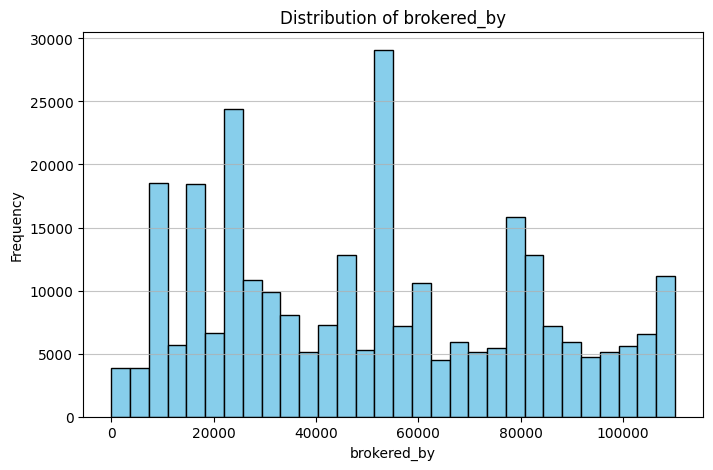

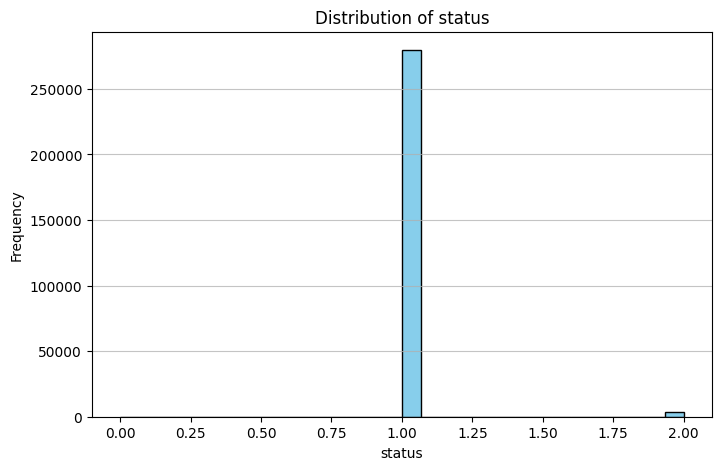

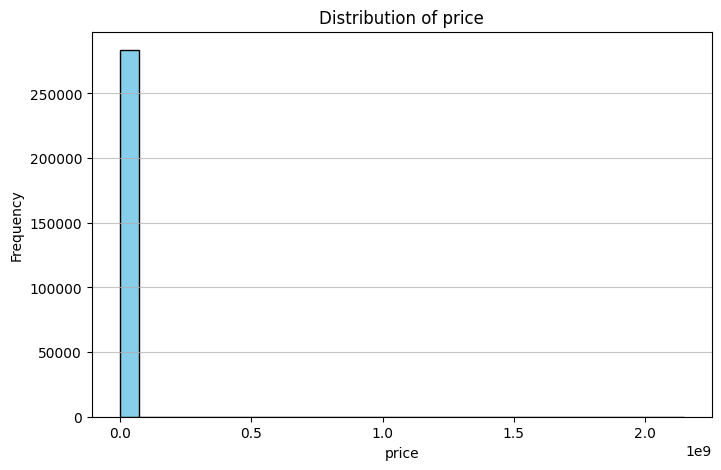

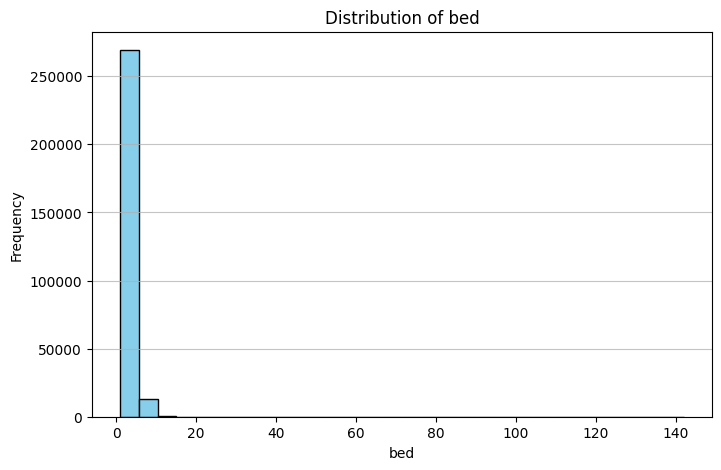

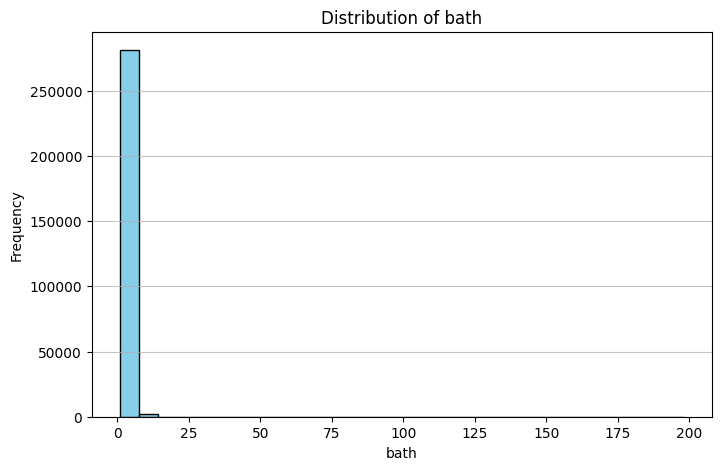

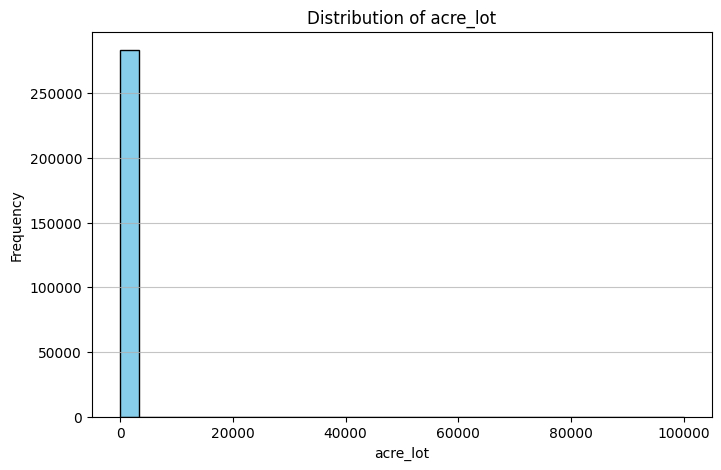

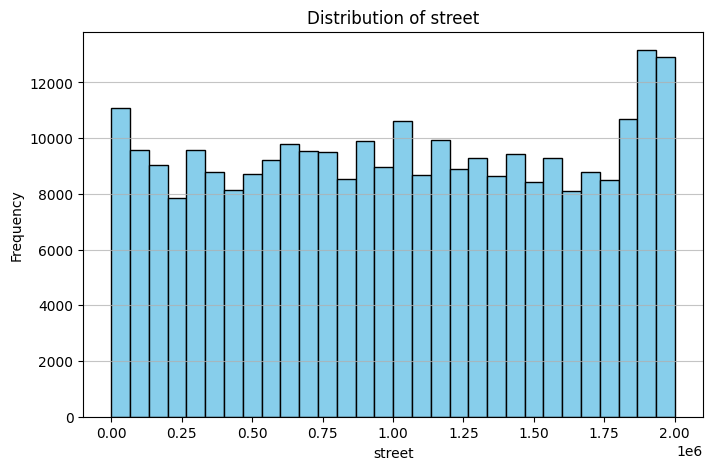

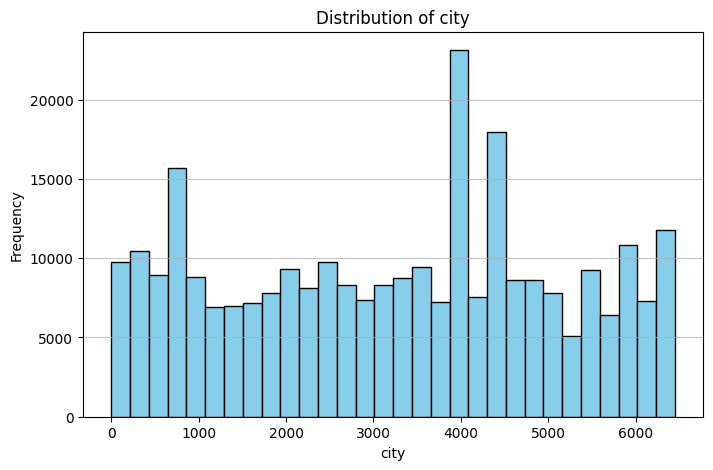

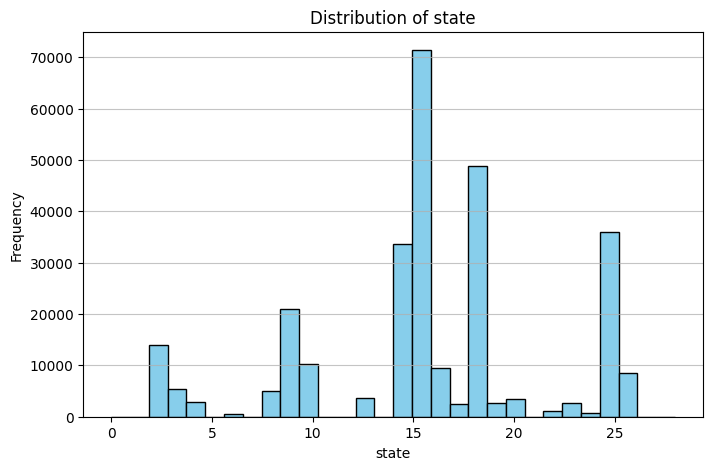

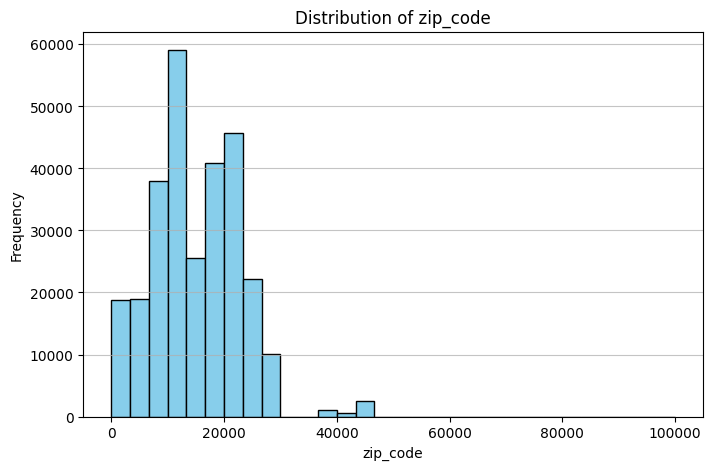

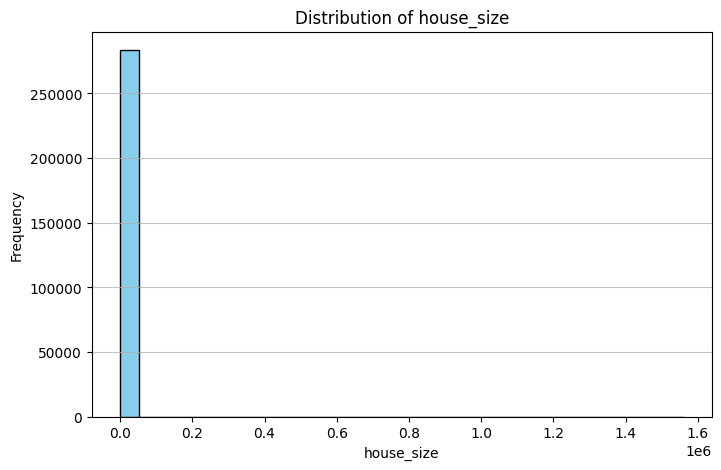

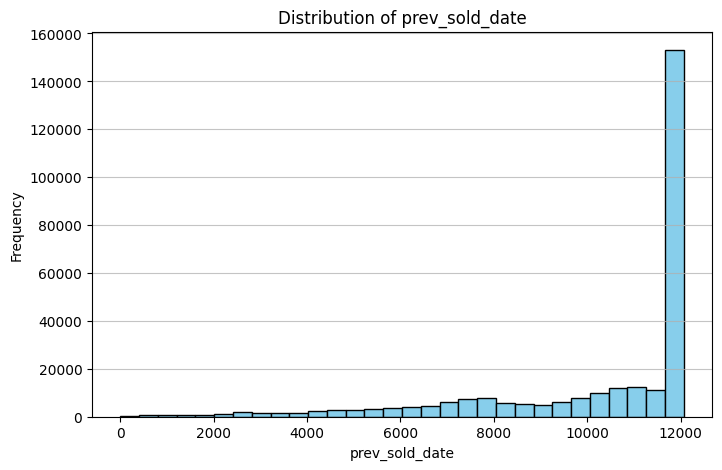

In [ ]:
# prompt: Plot the distribution of numerical features (e.g., size, number of rooms).

# Import matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np

# Identify numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

# Plot distribution of numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

This code plots the distribution of numerical features, like "size" or "number of rooms," in the dataset. It first identifies the numerical columns using select_dtypes(). Then, for each numerical column, it creates a histogram using plt.hist(), which shows how the values are distributed. The plt.figure() function sets the size of the plot, and plt.title(), plt.xlabel(), and plt.ylabel() add a title and labels to the plot. The plt.grid() function adds a grid for better readability, and plt.show() displays the plot. The bins parameter in plt.hist() controls how the data is grouped.

b.	Visualize the relationship between house price and location.

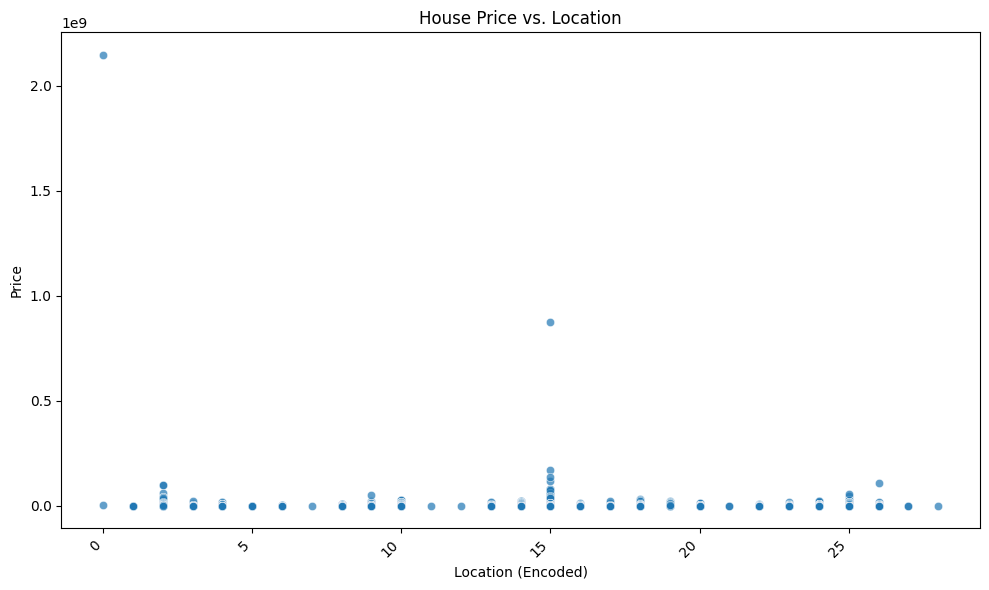

In [ ]:
# prompt: generate code for Visualize the relationship between house price and location.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'state' is the column containing location information
# If the column name is different, replace 'state' with the correct name
plt.figure(figsize=(10, 6))

# Convert 'price' column to numeric, handling errors
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Drop rows with NaN values in 'price' after conversion
data = data.dropna(subset=['price'])

sns.scatterplot(x='state', y='price', data=data, alpha=0.7)  # Changed 'location' to 'state'
plt.title('House Price vs. Location')
plt.xlabel('Location (Encoded)')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This code creates a scatter plot to show the relationship between house price and location. It converts the "price" column to numeric values and removes any rows with missing prices using dropna(). Then, it plots the location (state) on the x-axis and price on the y-axis with sns.scatterplot(). Labels and title are added with plt.title(), plt.xlabel(), and plt.ylabel(), and the x-axis labels are rotated for clarity using plt.xticks(). Finally, the plot is displayed with plt.show().

c.	Use pair plots to analyze feature interactions.

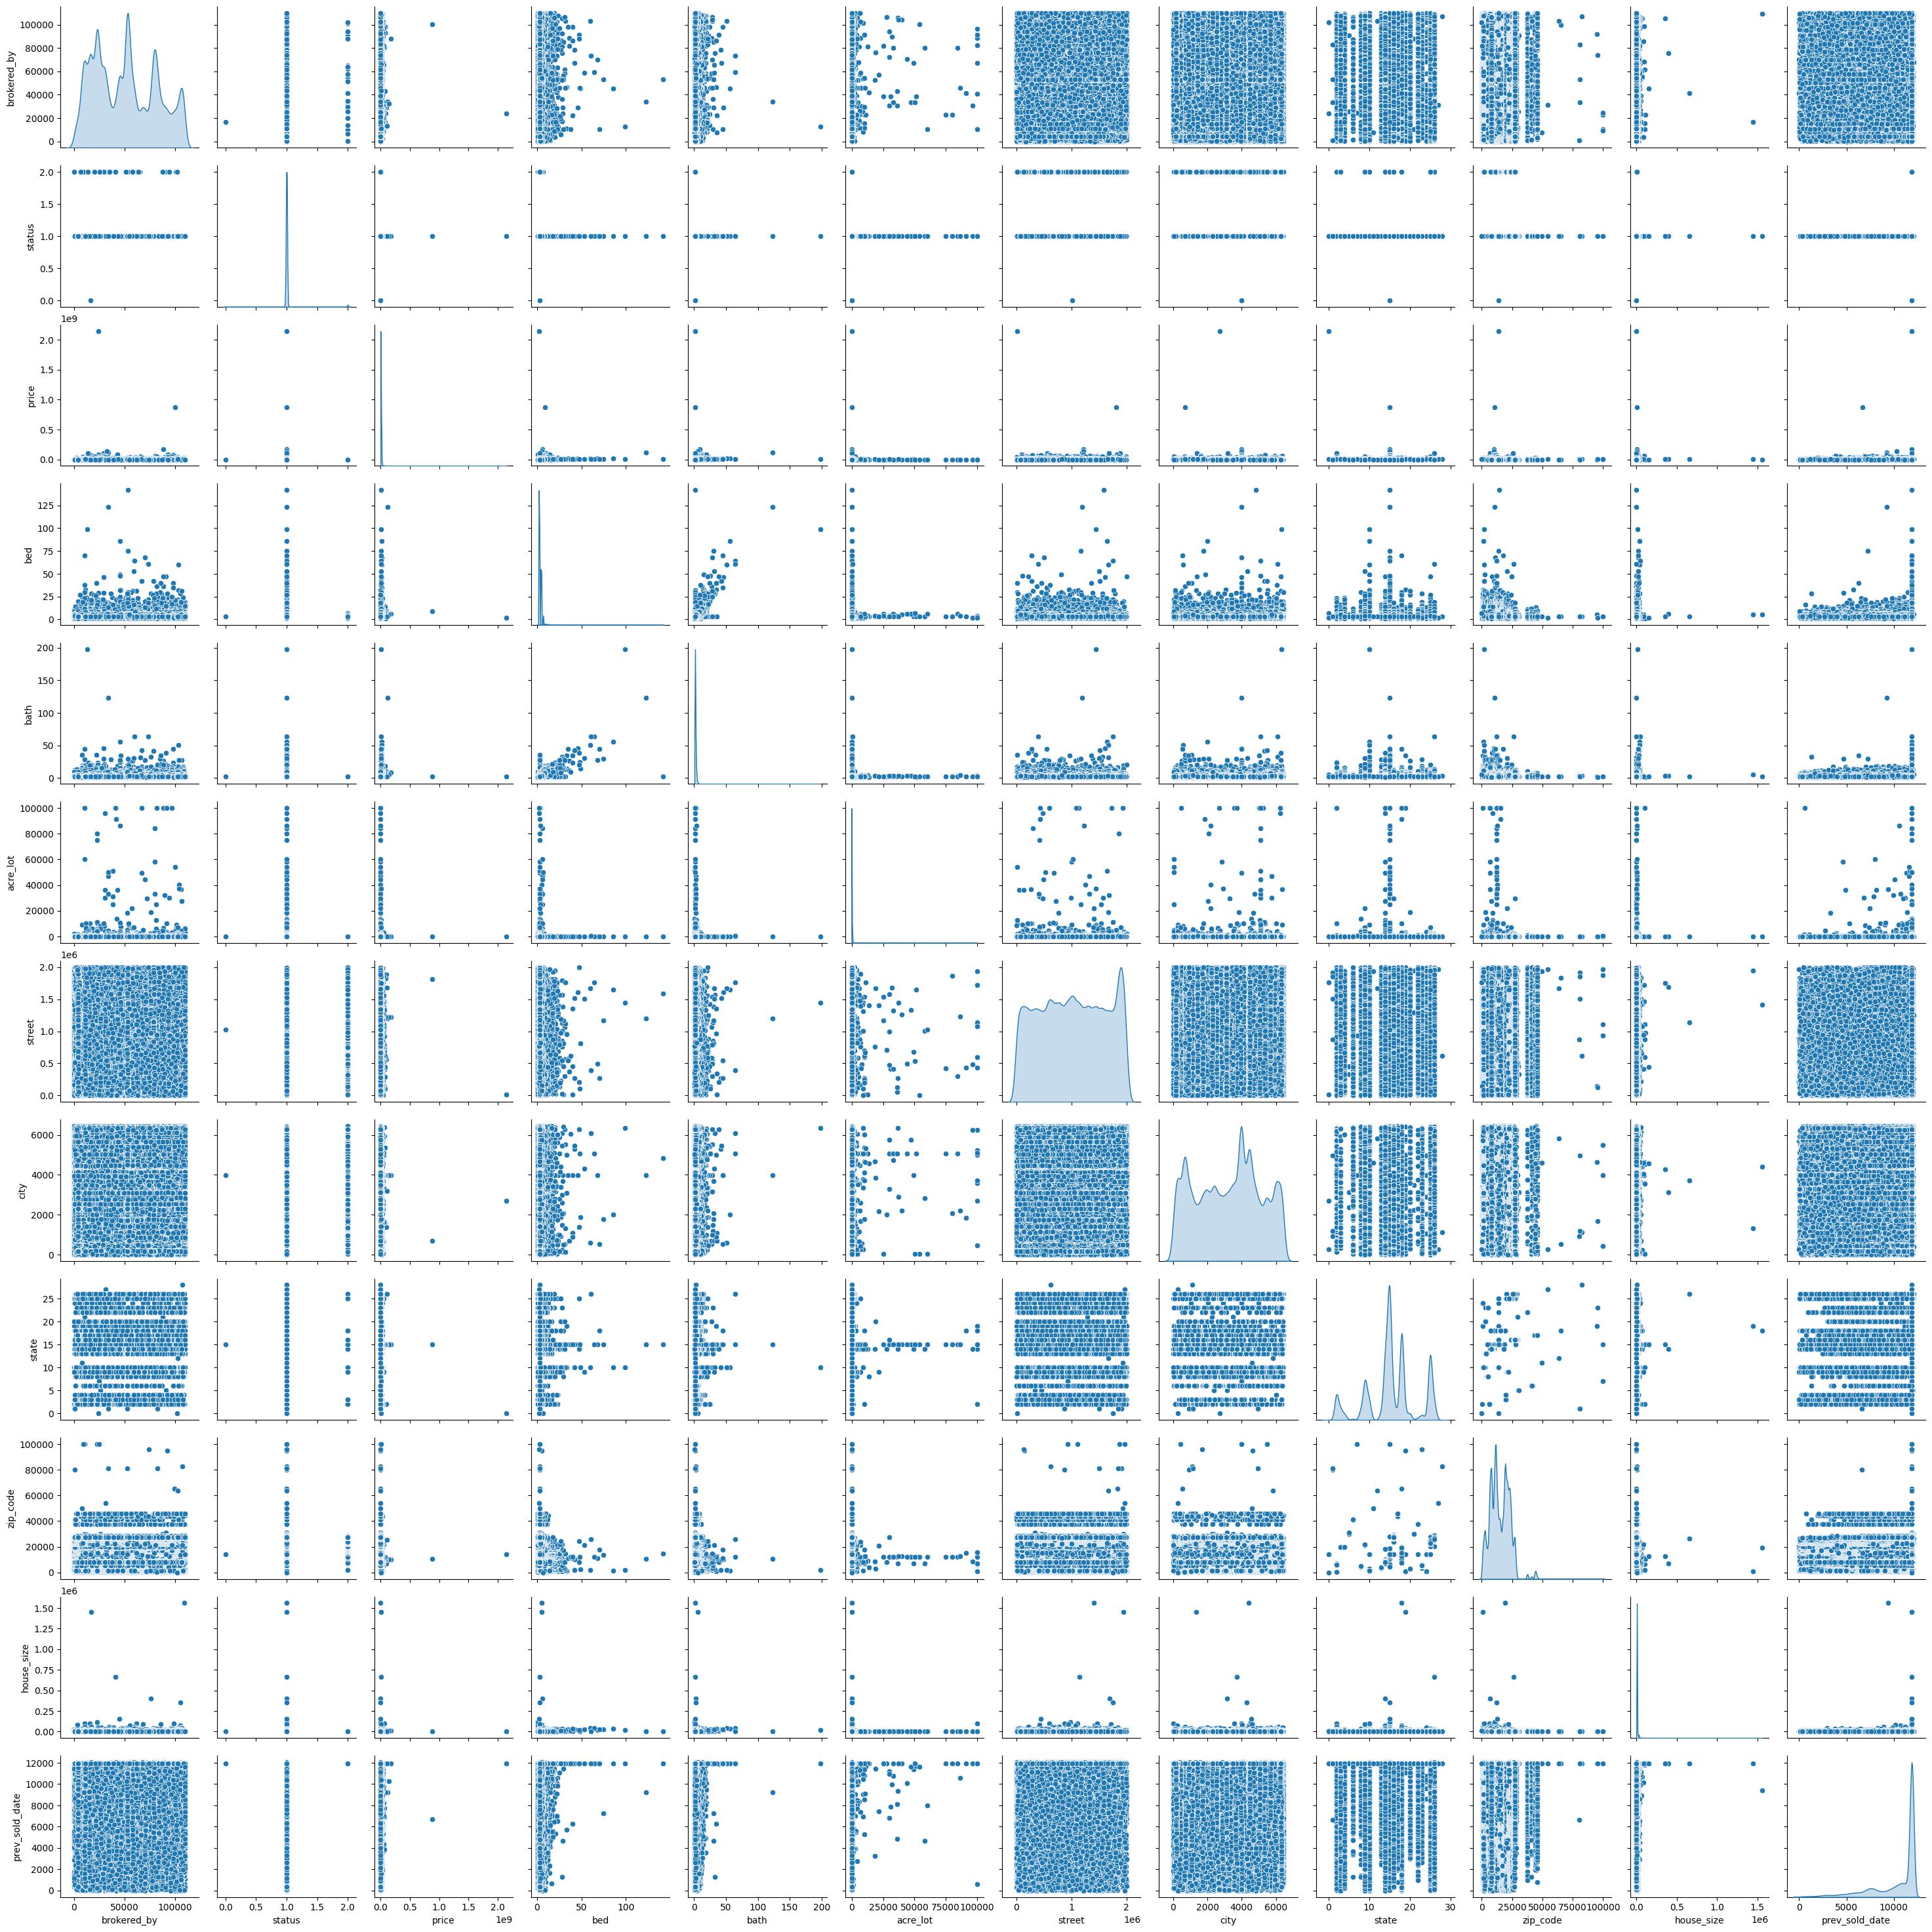

In [ ]:
# prompt:  Use pair plots to analyze feature interactions.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define numerical_cols within the current cell's scope
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

sns.pairplot(data[numerical_cols], diag_kind='kde')
plt.show()

This code creates pair plots to explore interactions between numerical features. It selects numerical columns using select_dtypes() and uses sns.pairplot() to display scatter plots for each pair and KDE(kernel density estimate) plots on the diagonal. plt.show() is then used to display the plot.

**4. Feature Engineering**

a.	Create new features:
*   Price per square foot.
*   Age of the house (current year - year built).



In [ ]:
# prompt: Price per square foot.

# Assuming 'house_size' is the column containing the square footage
# If the column name is different, replace 'house_size' with the correct name

# Convert 'house_size' to numeric, handling errors
data['house_size'] = pd.to_numeric(data['house_size'], errors='coerce')

# Drop rows with NaN values in 'house_size' after conversion
# This avoids potential issues if there are non-numeric values in 'house_size'
data = data.dropna(subset=['house_size'])

# Now calculate price per square foot
data['price_per_sqft'] = data['price'] / data['house_size']

print(data.head())

   brokered_by  status     price  bed  bath  acre_lot     street  city  state  \
0     103378.0       1  105000.0  3.0   2.0      0.12  1962661.0    30     19   
1      52707.0       1   80000.0  4.0   2.0      0.08  1902874.0    30     19   
2     103379.0       1   67000.0  2.0   1.0      0.15  1404990.0  2815     19   
3      31239.0       1  145000.0  4.0   2.0      0.10  1947675.0  4531     19   
4      34632.0       1   65000.0  6.0   2.0      0.05   331151.0  3454     19   

   zip_code  house_size  prev_sold_date  price_per_sqft  
0     601.0       920.0           11910      114.130435  
1     601.0      1527.0           11910       52.390308  
2     795.0       748.0           11910       89.572193  
3     731.0      1800.0           11910       80.555556  
4     680.0      1786.0           11910       36.394177  


This code calculates the price per square foot for houses. It first changes the "house_size" column to numbers using pd.to_numeric() and removes any rows with missing house sizes using dropna(). Then, it divides the "price" by the "house_size" to get the price per square foot and saves it in a new column called "price_per_sqft." Finally, it shows the first few rows of the updated data using print(data.head()).

In [ ]:
# prompt: Age of the house (current year - year built).

import datetime

current_year = datetime.datetime.now().year

# Check if 'year_built' column exists before calculating 'house_age'
if 'year_built' in data.columns:
    data['house_age'] = current_year - data['year_built']
else:
    print("Warning: 'year_built' column not found. 'house_age' column will not be created.")

print(data.head())

   brokered_by  status     price  bed  bath  acre_lot     street  city  state  \
0     103378.0       1  105000.0  3.0   2.0      0.12  1962661.0    30     19   
1      52707.0       1   80000.0  4.0   2.0      0.08  1902874.0    30     19   
2     103379.0       1   67000.0  2.0   1.0      0.15  1404990.0  2815     19   
3      31239.0       1  145000.0  4.0   2.0      0.10  1947675.0  4531     19   
4      34632.0       1   65000.0  6.0   2.0      0.05   331151.0  3454     19   

   zip_code  house_size  prev_sold_date  price_per_sqft  
0     601.0       920.0           11910      114.130435  
1     601.0      1527.0           11910       52.390308  
2     795.0       748.0           11910       89.572193  
3     731.0      1800.0           11910       80.555556  
4     680.0      1786.0           11910       36.394177  


This code calculates the house age by subtracting "year_built" from the current year. It checks if the "year_built" column exists, then creates a new "house_age" column. If the column is missing, it shows a warning. Finally, it prints the first few rows of the updated data.

b.	Normalize numerical features using Min-Max Scaling.

In [ ]:
# prompt: Normalize numerical features using Min-Max Scaling.

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Identify numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

# Replace infinite values with NaN
data[numerical_cols] = data[numerical_cols].replace([np.inf, -np.inf], np.nan)

# Impute NaN values with the median (or another appropriate strategy)
for col in numerical_cols:
    median_val = data[col].median()
    data[col] = data[col].fillna(median_val)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(data.head())

   brokered_by  status     price       bed      bath      acre_lot    street  \
0     0.938596     0.5  0.000049  0.014184  0.005076  1.200000e-06  0.980666   
1     0.478536     0.5  0.000037  0.021277  0.005076  8.000000e-07  0.950793   
2     0.938605     0.5  0.000031  0.007092  0.000000  1.500000e-06  0.702019   
3     0.283621     0.5  0.000068  0.021277  0.005076  1.000000e-06  0.973178   
4     0.314427     0.5  0.000030  0.035461  0.005076  5.000000e-07  0.165462   

       city     state  zip_code  house_size  prev_sold_date  price_per_sqft  
0  0.004650  0.678571   0.00601    0.000587        0.986908        0.000047  
1  0.004650  0.678571   0.00601    0.000976        0.986908        0.000022  
2  0.436366  0.678571   0.00795    0.000477        0.986908        0.000037  
3  0.702372  0.678571   0.00731    0.001151        0.986908        0.000033  
4  0.535421  0.678571   0.00680    0.001142        0.986908        0.000015  


This code normalizes numerical features by using Min-Max scaling. It first identifies the numerical columns, replaces infinite values with NaN, and fills missing values with the median. Then, it applies Min-Max scaling to transform the numerical values to a range between 0 and 1. Finally, it displays the updated dataset with print(data.head()).

**5. Correlation and Feature Selection**

a.	Compute correlation for numerical features.

Correlation Matrix:
                brokered_by    status     price       bed      bath  acre_lot  \
brokered_by        1.000000  0.019812 -0.007914  0.012357  0.007145  0.003029   
status             0.019812  1.000000 -0.002100  0.026204 -0.036261 -0.002128   
price             -0.007914 -0.002100  1.000000  0.078263  0.140863  0.000764   
bed                0.012357  0.026204  0.078263  1.000000  0.651201  0.002755   
bath               0.007145 -0.036261  0.140863  0.651201  1.000000 -0.001115   
acre_lot           0.003029 -0.002128  0.000764  0.002755 -0.001115  1.000000   
street             0.016194 -0.007808 -0.019263 -0.022837 -0.045120  0.000731   
city               0.000132 -0.005712  0.006883 -0.012113 -0.000505  0.002435   
state              0.008518  0.017302 -0.022170 -0.008397 -0.021854 -0.002427   
zip_code           0.022950  0.061431 -0.041828 -0.019193 -0.015437 -0.005815   
house_size         0.003255  0.016322  0.038847  0.155916  0.183189  0.009844   
prev_sol

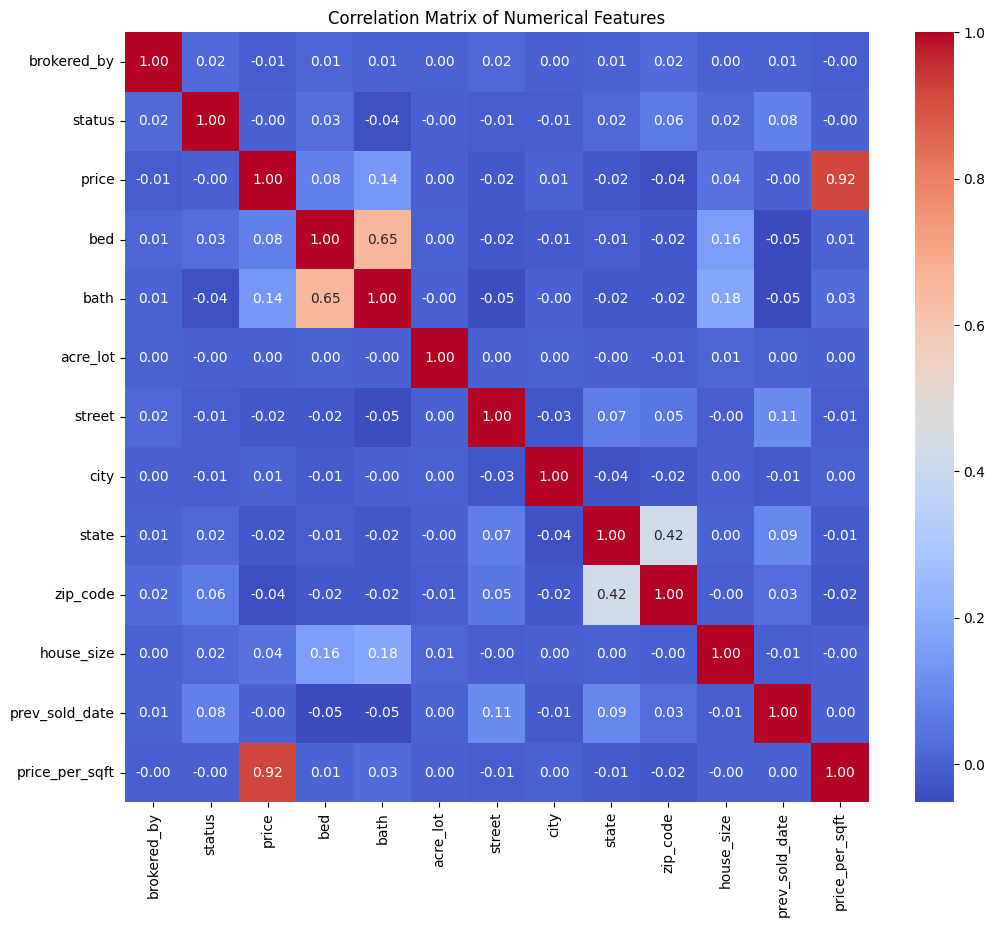

In [ ]:
# prompt: Compute correlation for numerical features.

# Compute the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


This code calculates the correlation between numerical features in the dataset. It first computes the correlation matrix using the corr() function, which shows how strongly features are related to each other. Then, it prints the correlation matrix. To visualize this, it creates a heatmap using sns.heatmap(), which colors the correlations and displays the values with annot=True. The coolwarm color map is used, and fmt=".2f" formats the values to two decimal places. Finally, it displays the heatmap with plt.show().

b.	Use feature importance from Random Forest to select key features.

Feature Importances:
           Feature    Importance
11  price_per_sqft  7.096564e-01
7            state  1.174643e-01
9       house_size  1.112892e-01
2              bed  1.310268e-02
3             bath  1.272209e-02
6             city  9.116445e-03
8         zip_code  8.548375e-03
5           street  7.654265e-03
10  prev_sold_date  5.471727e-03
0      brokered_by  4.798234e-03
4         acre_lot  1.762525e-04
1           status  4.892485e-09


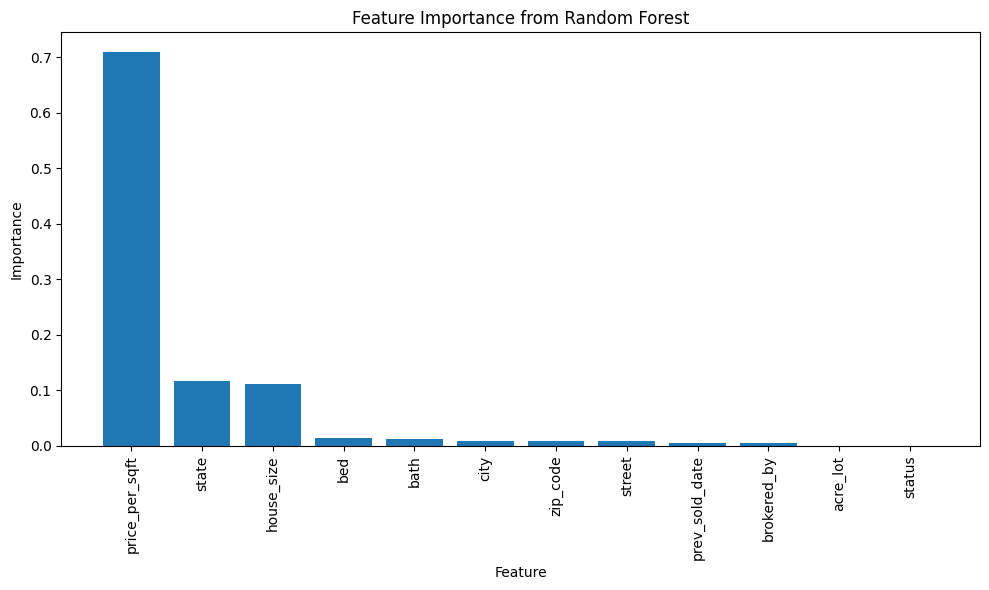


Key Features:


['price_per_sqft',
 'state',
 'house_size',
 'bed',
 'bath',
 'city',
 'zip_code',
 'street',
 'prev_sold_date',
 'brokered_by']

In [25]:
# prompt: generate a code for  Use feature importance from Random Forest to select key features

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data.drop('price', axis=1)
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importances)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Select key features (e.g., top 10 features)
key_features = feature_importances['Feature'].head(10).tolist()
print("\nKey Features:")
key_features


**6. Model Building**

a.	Split the dataset into training (80%) and testing (20%) sets.

In [26]:
# prompt: Split the dataset into training (80%) and testing (20%) sets.

X = data.drop('price',axis=1)
y = data['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (226829, 12)
X_test shape: (56708, 12)
y_train shape: (226829,)
y_test shape: (56708,)


This code splits the dataset into training and testing sets. It first separates the features (X) by dropping the "price" column and assigns the target variable (y) as the "price" column. Then, it uses train_test_split() to randomly split the data, with 80% for training and 20% for testing, controlled by the test_size=0.2 argument. The random_state=42 ensures the split is reproducible. Finally, it prints the shape of the training and testing sets for both features (X) and target (y).

b.	Train the following models:

*   Linear Regression
*   Random Forest
*   Gradient Boosting (XGBoost)


In [ ]:
# prompt: Train the following models:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load data
try:
    data = pd.read_csv("/content/realtor-data.zip.csv", on_bad_lines='skip')
except pd.errors.ParserError:
    !unzip realtor-data.zip.csv
    data = pd.read_csv("realtor-data.csv", on_bad_lines='skip')
data = pd.read_csv("/content/realtor-data.zip.csv", on_bad_lines='warn')

# Impute numerical columns with median
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    median_val = data[col].median()
    data[col] = data[col].fillna(median_val)

# Impute categorical columns with mode
categorical_cols = data.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    mode_val = data[col].mode()[0]
    data[col] = data[col].fillna(mode_val)

# Remove duplicates
data = data.drop_duplicates()

# Label encode categorical features
categorical_cols = data.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    data[col] = data[col].astype(str)
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Price per sqft and age of house
data['house_size'] = pd.to_numeric(data['house_size'], errors='coerce')
data = data.dropna(subset=['house_size'])
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data = data.dropna(subset=['price'])
data['price_per_sqft'] = data['price'] / data['house_size']
current_year = datetime.datetime.now().year
if 'year_built' in data.columns:
    data['house_age'] = current_year - data['year_built']

# Normalize numerical features
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
data[numerical_cols] = data[numerical_cols].replace([np.inf, -np.inf], np.nan)
for col in numerical_cols:
    median_val = data[col].median()
    data[col] = data[col].fillna(median_val)
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Split data into train and test
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# XGBoost Regressor
xgbr = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - MSE: {mse:.2f}, R2: {r2:.2f}')

evaluate_model(y_test, y_pred_linear, 'Linear Regression')
evaluate_model(y_test, y_pred_rf, 'Random Forest')
evaluate_model(y_test, y_pred_xgb, 'XGBoost')


c.	Evaluate models using:

*   RMSE
*   MAE
*   R^2 Score




In [ ]:
# prompt: Evaluate models using:
# RMSE
# MAE
# R^2 Score

from sklearn.metrics import mean_absolute_error
import numpy as np

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}')

evaluate_model(y_test, y_pred_linear, 'Linear Regression')
evaluate_model(y_test, y_pred_rf, 'Random Forest')
evaluate_model(y_test, y_pred_xgb, 'XGBoost')


**7. Model Optimization**

a.	Perform hyperparameter tuning using RandomizedSearchCV.

In [ ]:
# prompt: Perform hyperparameter tuning using RandomizedSearchCV.

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_distributions=param_grid,
                              n_iter=10,  # Number of parameter settings that are sampled
                              cv=3,  # Number of cross-validation folds
                              verbose=2,  # Display progress and results
                              n_jobs=-1,  # Use all available CPU cores
                              random_state=42)  # For reproducibility


# Fit the Random Forest model with hyperparameter tuning
rf_random.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", rf_random.best_params_)

# Evaluate the best model
best_rf = rf_random.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
evaluate_model(y_test, y_pred_best_rf, 'Random Forest (Tuned)')


b.	Evaluate the tuned model on the testing set.

In [ ]:
# prompt: Perform hyperparameter tuning using RandomizedSearchCV.

from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_distributions=param_grid,
                              n_iter=10,  # Number of parameter settings that are sampled
                              cv=3,  # Number of cross-validation folds
                              verbose=2,  # Display progress and results
                              n_jobs=-1,  # Use all available CPU cores
                              random_state=42)  # For reproducibility


# Fit the Random Forest model with hyperparameter tuning
rf_random.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", rf_random.best_params_)

# Evaluate the best model
best_rf = rf_random.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
evaluate_model(y_test, y_pred_best_rf, 'Random Forest (Tuned)')


# --- The code below was moved from the second cell ---
# prompt:  Evaluate the tuned model on the testing set.

# Evaluate the tuned model on the testing set.
y_pred_tuned_rf = best_rf.predict(X_test)
evaluate_model(y_test, y_pred_tuned_rf, 'Random Forest (Tuned)')

**8. Insights and Recommendations**

a.	Identify key factors driving house prices.

In [ ]:
# prompt: Identify key factors driving house prices.

# Assuming 'price' is the target variable and other columns are features
if 'price' in data.columns:
    X = data.drop('price', axis=1)
    y = data['price']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Get feature importances
    feature_importances = rf_model.feature_importances_

    # Create a DataFrame for feature importances
    features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    features_df = features_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

    print("Feature Importances:")
    print(features_df)

    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances from Random Forest')
    plt.gca().invert_yaxis()
    plt.show()

    # Select top k important features (e.g., top 10)
    k = 10
    selected_features = features_df['Feature'][:k].tolist()
    print(f"Top {k} selected features: {selected_features}")

else:
    print("Error: 'price' column not found. Please ensure it exists in your data.")


b.	Identify key factors driving house prices.

**9. Advanced Analytics (Optional)**

a.	Use SHAP to interpret the model.

In [ ]:
# prompt:  Use SHAP to interpret the model.

import shap

# Load data
try:
    data = pd.read_csv("/content/realtor-data.zip.csv", on_bad_lines='skip')
except pd.errors.ParserError:
    !unzip realtor-data.zip.csv
    data = pd.read_csv("realtor-data.csv", on_bad_lines='skip')
data = pd.read_csv("/content/realtor-data.zip.csv", on_bad_lines='warn')

# Impute numerical columns with median
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    median_val = data[col].median()
    data[col] = data[col].fillna(median_val)

# Impute categorical columns with mode
categorical_cols = data.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    mode_val = data[col].mode()[0]
    data[col] = data[col].fillna(mode_val)

# Remove duplicates
data = data.drop_duplicates()

# Label encode categorical features
categorical_cols = data.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    data[col] = data[col].astype(str)
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Price per sqft and age of house
data['house_size'] = pd.to_numeric(data['house_size'], errors='coerce')
data = data.dropna(subset=['house_size'])
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data = data.dropna(subset=['price'])
data['price_per_sqft'] = data['price'] / data['house_size']
current_year = datetime.datetime.now().year
if 'year_built' in data.columns:
    data['house_age'] = current_year - data['year_built']

# Normalize numerical features
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
data[numerical_cols] = data[numerical_cols].replace([np.inf, -np.inf], np.nan)
for col in numerical_cols:
    median_val = data[col].median()
    data[col] = data[col].fillna(median_val)
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Split data into train and test
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Use SHAP to interpret the model
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")


b.	Highlight features influencing individual predictions.

In [ ]:
# prompt: . Highlight features influencing individual predictions.

!pip install shap
import shap

# Assuming 'best_rf' is your trained best Random Forest model from the previous steps

# Create a SHAP explainer
explainer = shap.TreeExplainer(best_rf)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values for a single prediction (e.g., the first one)
sample_index = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[sample_index,:], X_test.iloc[sample_index,:])
# Summary plot for overall feature importance
shap.summary_plot(shap_values, X_test)
# The code calculates SHAP values for the test data. It initializes a SHAP TreeExplainer using the trained Random Forest model best_rf. Then, it computes the SHAP values for the test data. To understand a single prediction, it plots the force plot for the first sample, displaying how each feature contributes to the prediction.  Additionally, it generates a summary plot that provides an overview of the overall feature importances based on SHAP values, helping to interpret how the features influence the model's predictions.
